# Challenge Description 

Company XYZ is an e-commerce site that sells hand-made clothes.

You have to build a model that predicts whether a user has a high probability of using the site to
perform some illegal activity or not. This is a super common task for data scientists.

You only have information about the user first transaction on the site and based on that you
have to make your classification ("fraud/no fraud").

These are the tasks you are asked to do:
* For each user, determine her country based on the numeric IP address.
* Build a model to predict whether an activity is fraudulent or not. Explain how different
assumptions about the cost of false positives vs false negatives would impact the model.
* Your boss is a bit worried about using a model she doesn't understand for something as
important as fraud detection. How would you explain her how the model is making the
predictions? Not from a mathematical perspective (she couldn't care less about that), but
from a user perspective. What kinds of users are more likely to be classified as at risk?
* What are their characteristics?
* Let's say you now have this model which can be used live to predict in real time if an
activity is fraudulent or not. From a product perspective, how would you use it? That is, what kind of different user experiences would you build based on the model output?

# Data

There are 2 data files that you will need to load (in the problem2 folder in the data folder): 

### Fraud_Data.csv
**Columns:**
* **user_id** : Id of the user. Unique by user
* **signup_time** : the time when the user created her account (GMT time)
* **purchase_time** : the time when the user bought the item (GMT time)
* **purchase_value** : the cost of the item purchased (USD)
* **device_id** : the device id. You can assume that it is unique by device. I.e., transactions
with the same device ID means that the same physical device was used to buy
* **source** : user marketing channel: ads, SEO, Direct (i.e. came to the site by directly typing
the site address on the browser).
* **browser** : the browser used by the user.
* **sex** : user sex: Male/Female
* **age** : user age
* **ip_address** : user numeric ip address
* **class** : this is what we are trying to predict: whether the activity was fraudulent (1) or not
(0).

### IpAddress_to_Country.csv
**Columns:**
* **lower_bound_ip_address** : the lower bound of the numeric ip address for that country
* **upper_bound_ip_address** : the upper bound of the numeric ip address for that country
* **country** : the corresponding country. If a user has an ip address whose value is within
the upper and lower bound, then she is based in this country.

In [12]:
import pandas as pd
import numpy as np
import os

In [13]:
os.getcwd()

'/Volumes/Data/Chipy/Metis/data/problem2'

In [14]:
os.chdir('/Volumes/Data/Chipy/Metis/Data/problem2/')

In [15]:
fraud = pd.read_csv('Fraud_Data.csv')
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [16]:
len(fraud)

151112

In [17]:
ip_country = pd.read_csv('IpAddress_to_Country.csv')
ip_country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China


In [18]:
fraud.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [19]:
ip_country.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [20]:
ip_country.upper_bound_ip_address = ip_country.upper_bound_ip_address.astype(float)

In [21]:
#fraud['country'] = np.nan
#for i,x in fraud_top.iterrows():
#    mask = ip_country.lower_bound_ip_address <= x.ip_address <= ip_country.upper_bound_ip_address
#    country = ip_country.loc[mask, 'country'].values
#    if any(country):
#        fraud.loc[i, 'country'] = country



In [54]:
fraud_country = pd.read_csv('fraud_with_countries.csv')

In [55]:
fraud_country.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.tools import categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
gd = GradientBoostingClassifier()

In [26]:
test_len = int(round(len(fraud_country)*.8,0))
test_len

120890

In [27]:
fraud_country.columns

Index(['Unnamed: 0', 'user_id', 'signup_time', 'purchase_time',
       'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age',
       'ip_address', 'class', 'country'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ad2b518>]], dtype=object)

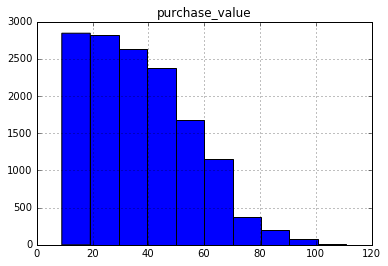

In [28]:
#Diff of signup to purchase
#fraud_country['purchase_delta'] = fraud_country['purchase_time'] - fraud_country['signup_time']
#Bucketing purchase value
fraud_country[fraud_country['class']==1][['purchase_value']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ad37cc0>]], dtype=object)

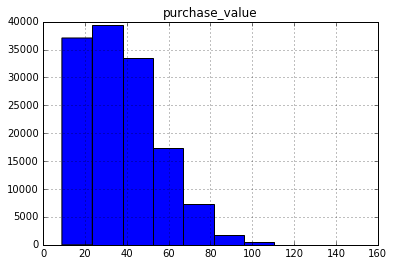

In [29]:
fraud_country[fraud_country['class']==0][['purchase_value']].hist()

In [30]:
fraud_country['purchase_val_bins'] = pd.cut(fraud_country['purchase_value'],bins = [0,40,75,175],labels = [1,2,3])

In [31]:
fraud_country['country_code']=pd.Categorical(fraud_country['country']).codes
fraud_country['source_code']=pd.Categorical(fraud_country['source']).codes
fraud_country['browser_code']=pd.Categorical(fraud_country['browser']).codes
fraud_country['sex_code']=pd.Categorical(fraud_country['sex']).codes


In [32]:
fraud_country['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [33]:
fraud_country.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_val_bins
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,2,0,1,39,7.327584e+08,0,84,1
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,0,0,0,53,3.503114e+08,0,171,1
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,2,3,1,53,2.621474e+09,1,171,1
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,2,4,1,41,3.840542e+09,0,-1,2
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,0,4,1,45,4.155831e+08,0,171,1


In [44]:
train_X = fraud_country[['purchase_val_bins','browser','source','country']].head(test_len)
train_Y = fraud_country['class'].head(test_len)
test_X = fraud_country[['purchase_val_bins','browser','source','country']].tail(len(fraud_country)-test_len)
test_Y = fraud_country['class'].head(len(fraud_country)-test_len)

In [46]:
gd.fit(train_X,train_Y)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [47]:
gd.score(test_X,test_Y)

0.90510224339884848

In [48]:
fraud_country['predict'] = gd.predict(fraud_country[['purchase_val_bins','browser','source','country']])


In [ ]:
#test_Y = np.zeros(len(fraud_country)-test_len)

In [49]:
false_pos = len(fraud_country[(fraud_country['predict']==1)&(fraud_country['class']==0)])
false_neg = len(fraud_country[(fraud_country['predict']==0)&(fraud_country['class']==1)])
correct_pos = len(fraud_country[(fraud_country['predict']==1)&(fraud_country['class']==1)])
correct_neg = len(fraud_country[(fraud_country['predict']==0)&(fraud_country['class']==0)])

In [50]:
print(false_pos, false_neg, correct_pos, correct_neg)

0 14151 0 136961


In [70]:
country_pct = fraud_country.groupby(['country','class'])['class'].count()

In [75]:
country_pct.loc['Nigeria']

class
0    64
1     3
Name: class, dtype: int64